In [1]:
import cv2
import numpy as np
import os
import os,glob,cv2
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
from numpy import zeros
%matplotlib inline
n=6
train_data = 'D:\download\Data\Train'
test_data = 'D:\download\Data\Test'

def load_data(data_path, image_size, classes):

    train_images = []
    
    print('Going to read images')
    for fields in classes:   
        index = classes.index(fields)
        print('Now going to read {} files (Index: {})'.format(fields, index))
        path = os.path.join(data_path, fields, '*g')
        files = glob.glob(path)
        for fl in files:
            try:               
                image = cv2.imread(fl, cv2.IMREAD_GRAYSCALE)
                image = cv2.resize(image, (64, 64))
            except:
                print(image)
            train_images.append([np.array(image),  one_hot_label2(fields)])

    return train_images

def arrayN(i,n):
    a = zeros([1,n])
    b = a.ravel()
    b[i] = 1
    return b

def one_hot_label2(fields):
    ohl = []
#     label = img.split('.')[0]
    if fields   == 'Bird':
        ohl = arrayN(0,n)
    elif fields == 'Cat':
        ohl = arrayN(1,n)
    elif fields == 'Dog':
        ohl = arrayN(2,n)
    elif fields == 'Horse':
        ohl = arrayN(3,n)
    elif fields == 'Lion':
        ohl = arrayN(4,n)
    elif fields == 'Monkey':
        ohl = arrayN(5,n)
    return ohl


In [3]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

train_path = 'D:\download\Data\Train'
train_data = os.listdir('D:\download\Data\Train')

num_classes = len(train_data)

img_size = 64

train_imgs = load_data(train_path, img_size, train_data)

print("Number of files in Validation-set:\t{}".format(len(train_imgs)))

Going to read images
Now going to read Bird files (Index: 0)
Now going to read Cat files (Index: 1)
Now going to read Dog files (Index: 2)
Now going to read Horse files (Index: 3)
Now going to read Lion files (Index: 4)
Now going to read Monkey files (Index: 5)
Number of files in Validation-set:	600


In [8]:
test_path = 'D:\download\Data\Test'
test_data = os.listdir('D:\download\Data\Test')

img_size = 64

test_imgs = load_data(test_path, img_size, test_data)

print("Number of files in Validation-set:\t{}".format(len(test_imgs)))

Going to read images
Now going to read Bird files (Index: 0)
Now going to read Cat files (Index: 1)
Now going to read Dog files (Index: 2)
Now going to read Horse files (Index: 3)
Now going to read Lion files (Index: 4)
Now going to read Monkey files (Index: 5)
Number of files in Validation-set:	90


In [9]:
tr_img_data = np.array([i[0] for i in train_imgs]).reshape(-1,64,64,1)
tr_lbl_data = np.array([i[1] for i in train_imgs])
tst_img_data = np.array([i[0] for i in test_imgs]).reshape(-1,64,64,1)
tst_lbl_data = np.array([i[1] for i in test_imgs])

In [5]:
model = Sequential()

model.add(InputLayer(input_shape=[64,64,1]))
model.add(Conv2D(filters=32,kernel_size=5,strides=1,padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=50,kernel_size=5,strides=1,padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Conv2D(filters=80,kernel_size=5,strides=1,padding='same', activation = 'relu'))
model.add(MaxPool2D(pool_size=5,padding='same'))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6,activation = 'softmax'))
optimizer = Adam(lr=0.002)

In [6]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x=tr_img_data, y=tr_lbl_data, epochs=50, batch_size=100)
model.summary()

Epoch 1/50
600/600 [==============================] - ETA: 3:16 - loss: 10.0790 - acc: 0.21 - ETA: 1:18 - loss: 10.7960 - acc: 0.18 - ETA: 19s - loss: 11.0644 - acc: 0.1800 - 40s 66ms/step - loss: 10.8530 - acc: 0.1683
Epoch 2/50
600/600 [==============================] - ETA: 0s - loss: 5.7330 - acc: 0.200 - ETA: 0s - loss: 3.5156 - acc: 0.176 - ETA: 0s - loss: 2.8697 - acc: 0.170 - 0s 406us/step - loss: 2.6903 - acc: 0.1700
Epoch 3/50
600/600 [==============================] - ETA: 0s - loss: 1.7999 - acc: 0.150 - ETA: 0s - loss: 1.8004 - acc: 0.153 - ETA: 0s - loss: 1.7963 - acc: 0.178 - 0s 398us/step - loss: 1.7951 - acc: 0.1800
Epoch 4/50
600/600 [==============================] - ETA: 0s - loss: 1.7853 - acc: 0.190 - ETA: 0s - loss: 1.7936 - acc: 0.193 - ETA: 0s - loss: 1.7959 - acc: 0.174 - 0s 377us/step - loss: 1.7945 - acc: 0.1817
Epoch 5/50
600/600 [==============================] - ETA: 0s - loss: 1.7851 - acc: 0.210 - ETA: 0s - loss: 1.7931 - acc: 0.160 - ETA: 0s - loss: 1.

accuracy: 0.28888888888888886


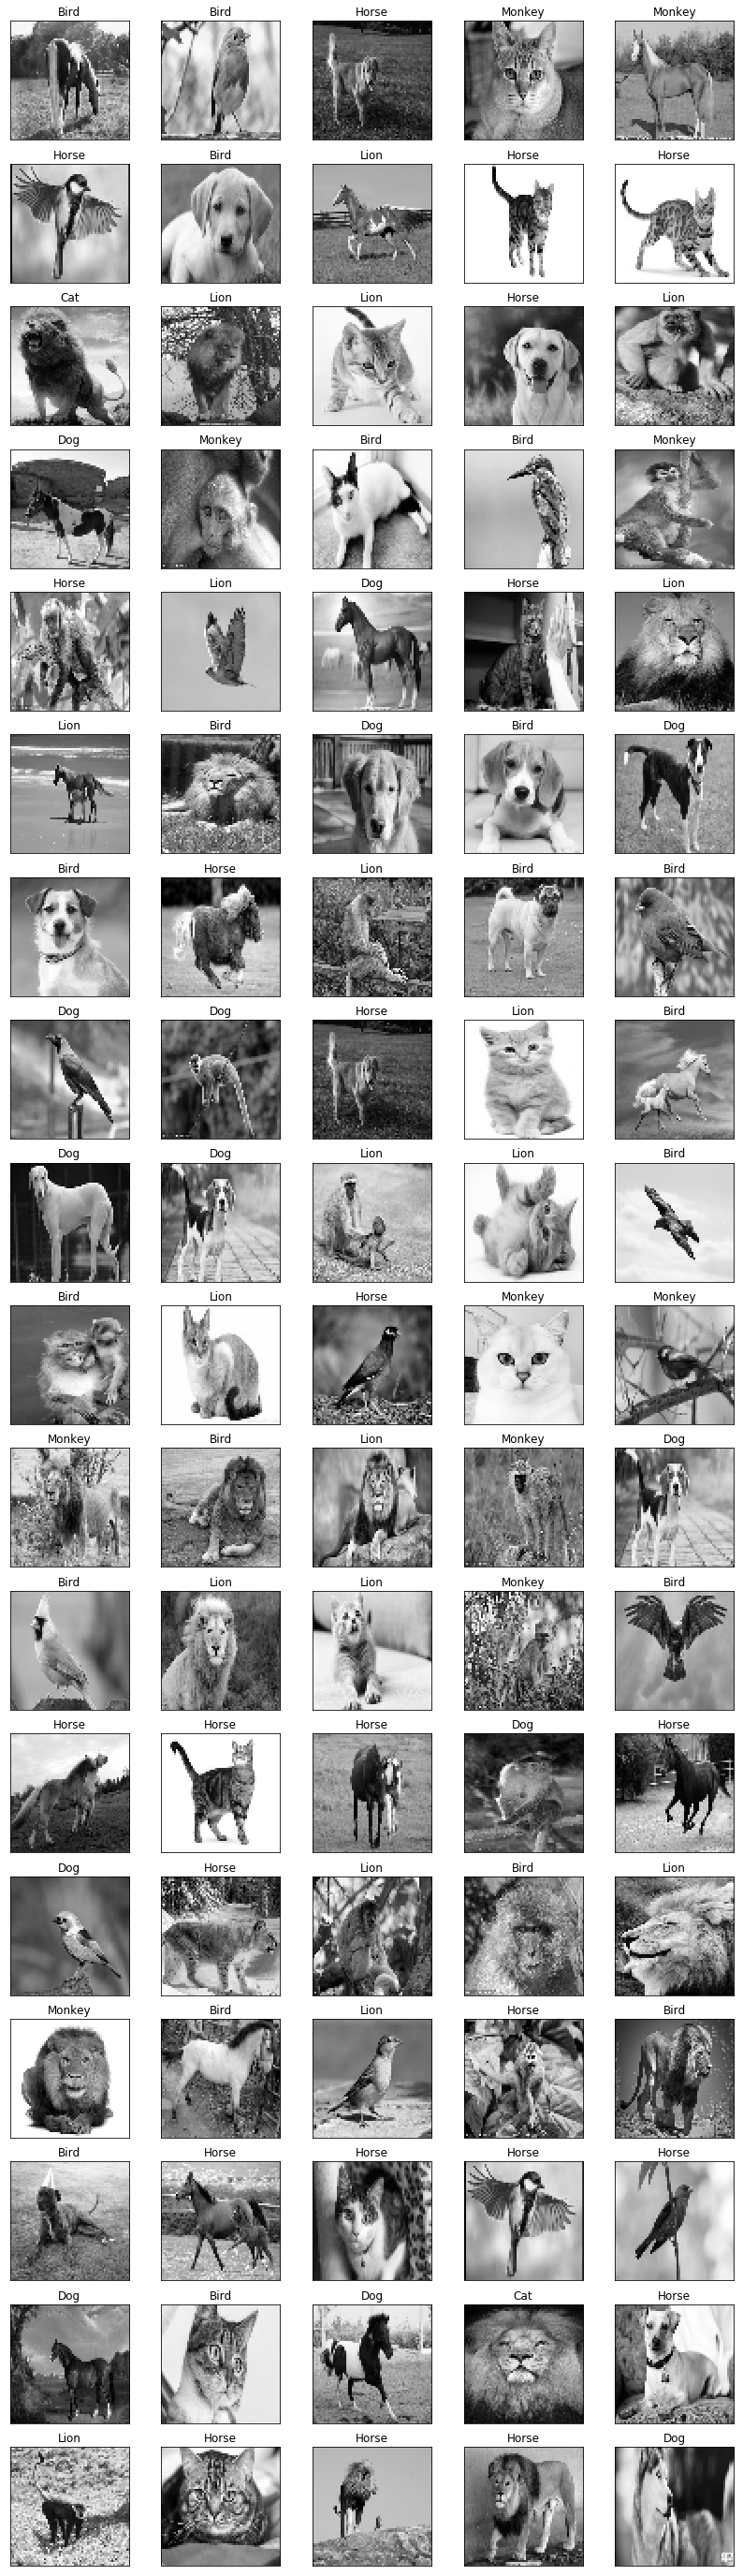

In [16]:
fig = plt.figure(figsize=(14,50))
z=0;
for cnt, data in enumerate(test_imgs[0:90]):
    d=data[1]
    y = fig.add_subplot(18, 5, cnt+1)
    img = data[0]
    data = img.reshape(1, 64, 64, 1)
    
    model_out = model.predict([data])
    
    if np.argmax(model_out) == 0:
        str_label='Bird'
    elif np.argmax(model_out) == 1:
        str_label='Cat'
    elif np.argmax(model_out) == 2:
        str_label='Dog'
    elif np.argmax(model_out) == 3:
        str_label='Horse'
    elif np.argmax(model_out) == 4:
        str_label='Lion'
    elif np.argmax(model_out) == 5:
        str_label='Monkey'

    if np.argmax(d)==np.argmax(model_out):
         z=z+1;
    
    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
print('accuracy:',z/90)

In [23]:
model.fit(x=tr_img_data, y=tr_lbl_data, epochs=50, batch_size=100)

Epoch 1/50
600/600 [==============================] - ETA: 1s - loss: 0.0916 - acc: 0.970 - ETA: 0s - loss: 0.1246 - acc: 0.960 - ETA: 0s - loss: 0.1309 - acc: 0.954 - 1s 954us/step - loss: 0.1437 - acc: 0.9483
Epoch 2/50
600/600 [==============================] - ETA: 0s - loss: 0.1538 - acc: 0.940 - ETA: 0s - loss: 0.1356 - acc: 0.953 - ETA: 0s - loss: 0.1659 - acc: 0.946 - 0s 376us/step - loss: 0.1679 - acc: 0.9467
Epoch 3/50
600/600 [==============================] - ETA: 0s - loss: 0.0973 - acc: 0.980 - ETA: 0s - loss: 0.1385 - acc: 0.956 - ETA: 0s - loss: 0.2120 - acc: 0.946 - 0s 376us/step - loss: 0.2246 - acc: 0.9467
Epoch 4/50
600/600 [==============================] - ETA: 0s - loss: 0.3109 - acc: 0.930 - ETA: 0s - loss: 0.2601 - acc: 0.923 - ETA: 0s - loss: 0.2687 - acc: 0.924 - 0s 378us/step - loss: 0.2714 - acc: 0.9200
Epoch 5/50
600/600 [==============================] - ETA: 0s - loss: 0.0924 - acc: 0.960 - ETA: 0s - loss: 0.2813 - acc: 0.913 - ETA: 0s - loss: 0.2330 - a

accuracy: 0.35555555555555557


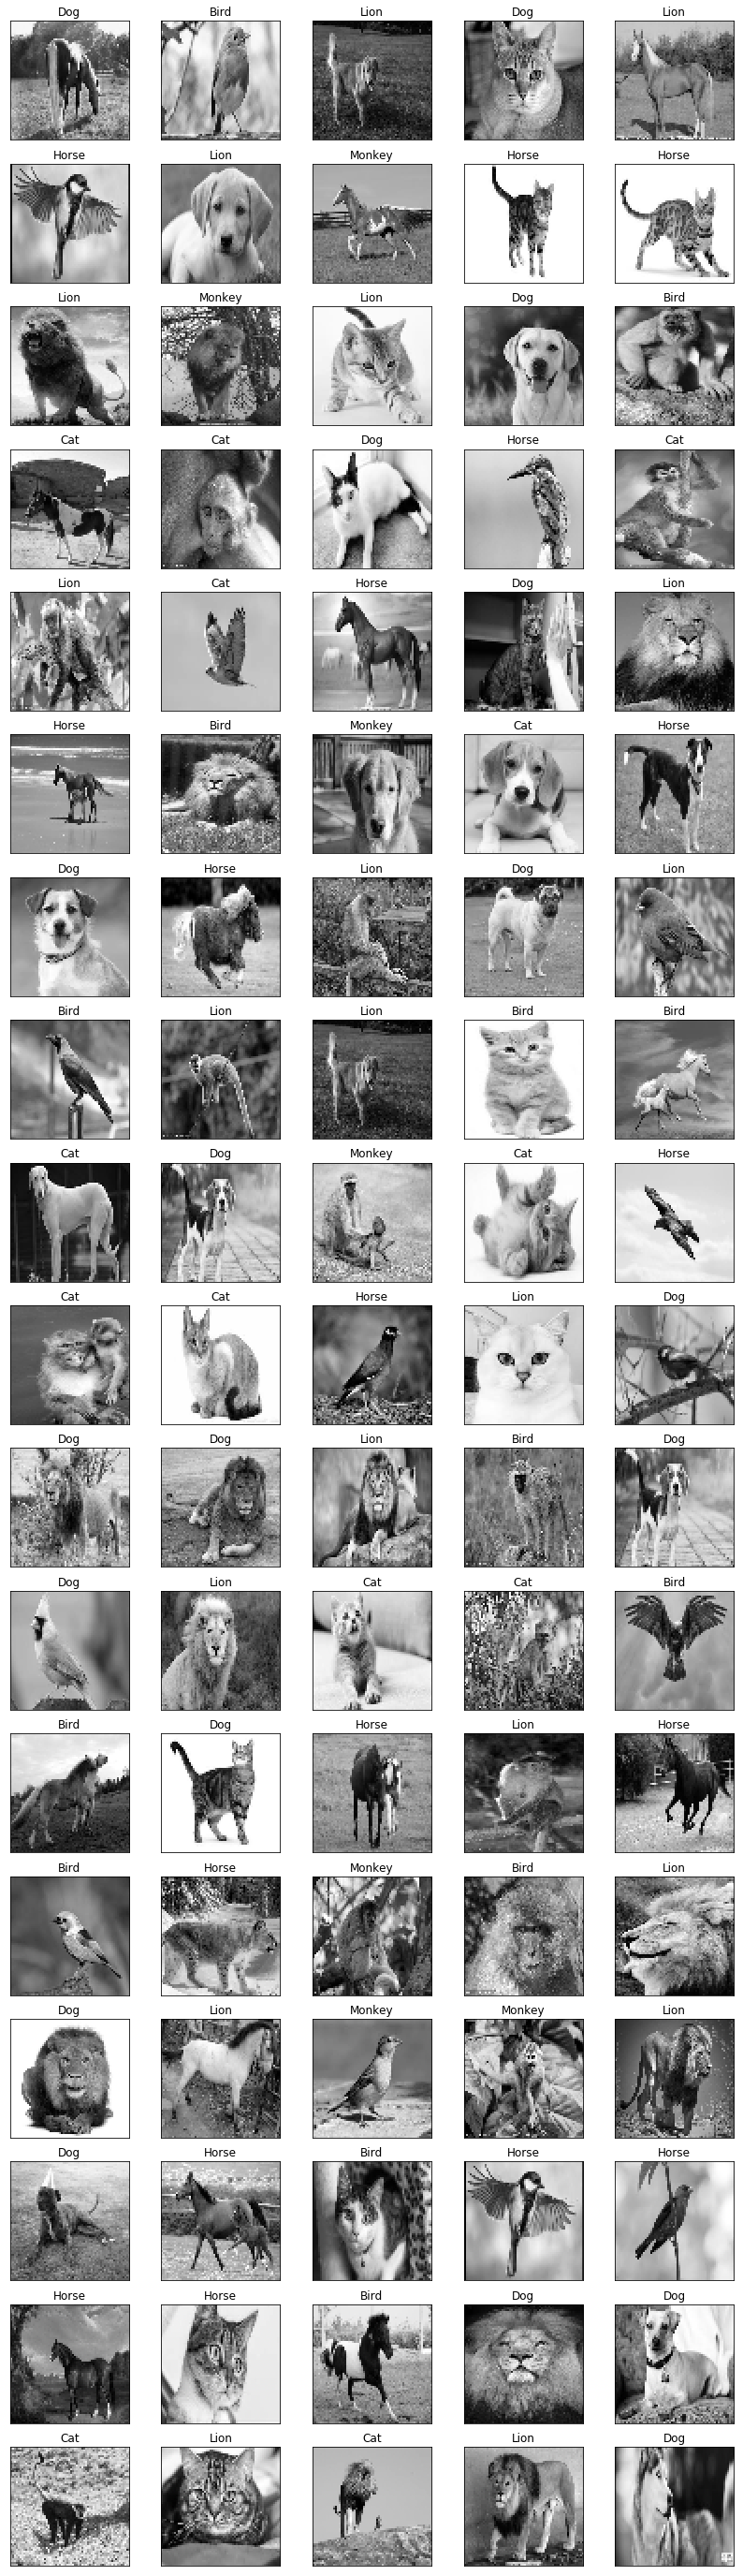

In [24]:
fig = plt.figure(figsize=(14,50))
z=0;
for cnt, data in enumerate(test_imgs[0:90]):
    d=data[1]
    y = fig.add_subplot(18, 5, cnt+1)
    img = data[0]
    data = img.reshape(1, 64, 64, 1)
    
    model_out = model.predict([data])
    
    if np.argmax(model_out) == 0:
        str_label='Bird'
    elif np.argmax(model_out) == 1:
        str_label='Cat'
    elif np.argmax(model_out) == 2:
        str_label='Dog'
    elif np.argmax(model_out) == 3:
        str_label='Horse'
    elif np.argmax(model_out) == 4:
        str_label='Lion'
    elif np.argmax(model_out) == 5:
        str_label='Monkey'

    if np.argmax(d)==np.argmax(model_out):
         z=z+1;
    
    y.imshow(img, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
print('accuracy:',z/90)